# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2022
# Hilser Lab 
# April 01, 2022

#  State Transitions & Modeling

Today we’re going to model the transition between the two states **F** and **U**.

## Libraries you will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#----------------------------------------------#
# Parameters and Definitions from the last lab #
#----------------------------------------------#
deltaHTm = 100000
Tm = 323.15
R = 1.987

T = np.arange(273,373,0.2)

deltaG = deltaHTm * (1 - (T / Tm))


F_stat = 1
U_stat = np.exp(-deltaG / (R*T))

Q = F_stat + U_stat

F_prob = F_stat / Q
U_prob = U_stat / Q

## A. Calculating Experimental Observables from Probabilities

**Temperature-Independent Observables**

For any observable that is sensitive to equilibrium (i.e., there is a different signal for the U and the F states),
we can write the expression called the average excess observable (denoted by <> brackets), which means;
	
\<Obs\> = $\Sigma$(Pi*Obsi) &emsp;&emsp;&emsp;&emsp;&emsp;(7A)				

which for a two state equilibrium becomes;
	
\<Obs\> = Pf * Obsf + Pu * Obsu  &emsp;&emsp;&emsp;&emsp;&emsp;(7B)

To demonstrate this function on a simple example, we can claim that Obsf and Obsu are constants and do not
change with temperature.  The functions looks as follows: 

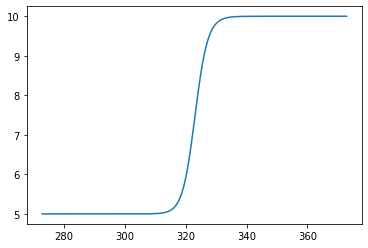

In [3]:

obsF = 5
obsU = 10

avgExcessObsNTD = F_prob * obsF + U_prob * obsU

plt.plot(T,avgExcessObsNTD)

**Comment**: We note that the \<Obs\> varies from 5 to 10. At low temperature, when the F state is
more stable (i.e. ΔGu > 0) most of the molecules are in the F state and the \<Obs\> ~5. At high
temperature the situation is opposite and most molecules are in the U state and \<Obs\> ~ 10.
Within the transtion region some molecules are in F and others are in U and the \<Obs\> will be
somewhere between the extremes.

**NOTE**: The values for the F and U state are set by whatever instrument you are using to observe these states. \<Obs\> could have also gone from 10 to 5, with the folded state producing a higher value.

**Temperature-Dependent Observables**

Of course the baselines can also ghave a temperature dependence, so we can write expressions for
the folded and unfolded state observables as:

\<Obsf(T)\> = mf * T + bf <br>
and <br>
\<Obsu(T)\> = mu * T + bu

where mf and mu, and bf and bu are the slopes and intercepts respectively for the F and U state observable.

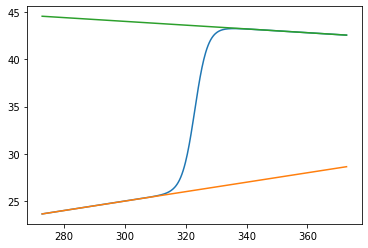

In [4]:
# Temp dependent Observables

mf = 0.05
bf = 10.0
mu = -0.02
bu = 50

obsFTD = mf * T + bf
obsUTD = mu * T + bu

avgExcessObsTD = F_prob * obsFTD + U_prob * obsUTD

plt.plot(T, avgExcessObsTD)
plt.plot(T, obsFTD)
plt.plot(T, obsUTD)

## B. Noisy Experimental Observables from Probabilities

In reality, observable data do not lie along some smooth line, but have experimental error. This error is often Gaussian (why do you think this is?), so we can mimic this by using the `numpy.random.normal(mean,std,size)` function to produce random numbers pulled from a gaussian distribution.

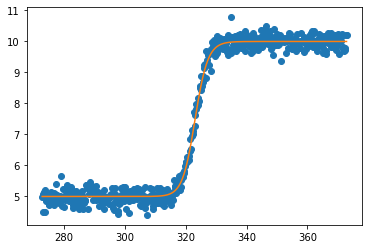

In [5]:
# Add Gaussian Noise

avgObsErr = avgExcessObsNTD + np.random.normal(0,0.2,np.size(T))

plt.plot(T,avgObsErr,'o')
plt.plot(T,avgExcessObsNTD)


## C. Fitting Data using Nonlinear Least-Squares (NLLS)

To begin NLLS, we start with our original simplified data which involves no temperature dependent baselines.
We will fit more complicated data later. Adding noise to this data produced the noisy unfolding plot from above.

**Least-Squares Methods** <br>
Experimental biologists are often faced with the task of evaluating “constants” associated with a
particular process for which data has been accumulated. In our case for instance, we wish to know the
equilibrium constant for a two-state equilibrium at different temperatures. Traditionally, evaluating
the value of a constant required that the data be plotted either in reciprocal or log space, or in some
combination of transformations such that the data would yield a line and the slope and intercept
could be interpreted in terms of the physical constants being sought. Examples of this type of
approach are Scatchard, Lineweaver-Burke, and Hill plots among many others. Least-squares is an approach to obtaining the physical constants but is statistically more accurate because it does not
involve transformations of the data. <br><br>
Least-squares methods are comprised of a group of numerical procedures that obtain “optimal values”
for a parameter vector a. The procedure works by taking an original estimation vector g and uses that
to generate a “better” estimate, which in turn can be used to get an “even better” estimate. As such,
least-squares methods are iterative, gradually converging (hopefully) on the “best” estimate. In leastsquares
“better” is measured by a metric called (chi-squared) which is: <br>

<img src="http://www.gordus.org/public_images/chi2.png" style="width: 300px;"/>
<br>

where y(xi) is the value of the dependent variable in the data at xi, and f(xi,a) is the computed value of
the function f(x) using the values in the parameter vector a. The point of least-squares methods is to
find values for the vector a that minimize the difference between y(xi) and f(xi,a) and thus minimize chisquared.
All least squares methods share the goal of minimizing chi-squared. <br>

What differs for different least squares methods is how the algorithm uses the current values of the a
vector to generate new estimates, a topic that is beyond the current scope. There are multiple
approaches to solving this problem (e.g., Gauss-Newton, Steepest Decent, Nelder Mead Simplex,
Marquardt, and combinations). Commercially available nonlinear least squares packages use one
method or another, and as it turns out different methods are better at solving certain types of problems
than others. Students are encouraged to learn what type of NLLS method is employed in the
package they use. In cases where students are unable to successfully fit their data with one package, it
is sometimes the case that a NLLS package with a different parameter estimation algorithm may be
more suitable for the form of the equation they are fitting and may be successful. In any event, read up
on this on your own time. <br><br>


**The three elements of NLLS are:**
<br><br>

1. **The data**: NLLS is generally performed on data that is in the form of x and y, where x is the independent
variable (such as temperature or time), and y is the dependent variable and is usually an experimental
readout (such as fluorescence, absorbance, activity, etc.).
2. **The fitting function**: This is the function that theoretically describes the data being measured. For instance, data for a quadratic equation will follow the function:

<img src="http://www.gordus.org/public_images/polynomial.png" style="width: 300px;"/>

3. **The parameter *a* vector**: In the fitting function above, there is a vector of constants (i.e., *a* = {a1,
a2, a3}) that when inserted in the function describe the value of y at each value of x.

<br>

For today's exercise, you will use the `curve_fit` function you imported, and which you have used in a prior lab. As a reminder, the syntax for this funciton is:


`params, pcov = curve_fit(function,x,y,p0=[])`

Input:

1. function: This is the function you are trying to fit the data to. The first argument of this function should be the data, followed by the parameters you are trying to fit, i.e. ` function(x,p0, p1, ...)`. You'll notice we used the correct format when we defined the Hill equation function above.
2. x: These are the independent variables.
3. y: These are the observed dependent variables.
4. p0: These are your initial guesses for what the parameters might be. The order in which you enter them into this array should match the order in which they are called in the function.

Output:

1. params: These are the best fit parameters, in the order in which they are called in the function.
2. pcov: The estimated covariance of params. You can use this to determine the estimated error of the parameter estimations by using the following code: `perr = np.sqrt(np.diag(pcov))`.

**DO  THE FOLLOWING**

Use the curve_fit tool to fit the noisy data above to a melting curve where the observables are temperature independent (i.e. the avgExcessObsNTD function from above). The parameters will be Tm, $\Delta$HTm, obsF, obsU. Remember, you have to supply guesses for the parameters. Once you fit the curve, plot the noisy data, and your predicted curve based on your fit parameters.

## Student Input Cell

Tm:    323.0020582280817
ΔH_Tm: 98092.17977885627
ObsF:  4.972746583656592
ObsU:  10.006361288655542


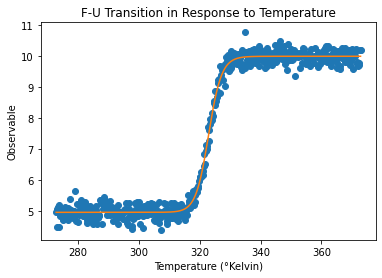

In [6]:
def prob_calc(T, tm, dH_tm):
    deltaG = dH_tm * (1 - (T / tm))

    F_stat = 1
    U_stat = np.exp(-deltaG / (R*T))

    Q = F_stat + U_stat

    F_prob = F_stat / Q
    U_prob = U_stat / Q
    
    return (F_prob, U_prob)

def fxn1(x, tm, dH_tm, obsF, obsU):
    F_prob, U_prob = prob_calc(x, tm, dH_tm)
    return F_prob * obsF + U_prob * obsU
    

params, pcov = curve_fit(fxn1, T, avgObsErr, p0=[320, 9999, 4, 11])

plt.plot(T,avgObsErr,'o')
plt.plot(T, fxn1(T, params[0], params[1], params[2], params[3]))
plt.xlabel('Temperature (\u00b0Kelvin)')
plt.ylabel('Observable')
plt.title('F-U Transition in Response to Temperature')

print('Tm:    {}'.format(params[0]))
print('\u0394H_Tm: {}'.format(params[1]))
print('ObsF:  {}'.format(params[2]))
print('ObsU:  {}'.format(params[3]))

plt.show()

## D. Fitting data with unknown parameters

In the above exercise, you fit your function to noisy data where you knew the parameters beforehand because you simply added noise to a function you had had defined earlier. Now, you will use your fitting function to define the parameters for experimental data where you don't know the parameters before hand. Use `data = numpy.loadtxt('filename')` to import the data assigned to you. The first column of data will be temperatures, and the second column will be observables. Remember that if you want to extract rows or columns from a two-dimensional array, you use the following synax: <br>

`first_column = array[:,0]`
`first_row = array[0,:]`

**Do the following**

Import your data, and fit it to a melting curve to extract the Tm, $\Delta$H(Tm), obsF, and obsU for your dataset. Print the best-fit parameters, and plot your data and the predicted curve from your best-fit parameters.

## Student Input Cell

Tm:    318.14993076035114
ΔH_Tm: 120014.21867598577
ObsF:  5.004580246131535
ObsU:  9.997141913166017


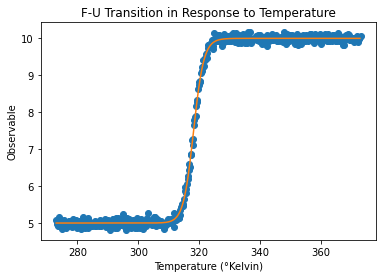

In [7]:
# My assigned dataset was out5.dat
data = np.loadtxt('out5.dat')

params, pcov = curve_fit(fxn1, data[:,0], data[:,1], p0=[320, 9999, 4, 11])

plt.plot(data[:,0], data[:,1], 'o')
plt.plot(T, fxn1(T, params[0], params[1], params[2], params[3]))
plt.xlabel('Temperature (\u00b0Kelvin)')
plt.ylabel('Observable')
plt.title('F-U Transition in Response to Temperature')

print('Tm:    {}'.format(params[0]))
print('\u0394H_Tm: {}'.format(params[1]))
print('ObsF:  {}'.format(params[2]))
print('ObsU:  {}'.format(params[3]))

plt.show()